In [11]:
import numpy as np
import csv
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 16
ms = 10
lw = 5

fcloud = ['M3','M4','M8']
marker = ['x','d','.']

In [12]:
def zboldyrev(p):
    return (p/9.+1.-(1./3.)**(p/3.))

def zshe(p):
    return (p/9.+2.-2.*(2./3.)**(p/3.))

In [13]:
ddir = "/Users/roxanachira/Dropbox/chira2018/pics/data/"

header = True
ref,rlabel,p,zeta,ezeta,z,ez = np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])

ifile = glob(('%scomp_obs_vsf.csv' % ddir))[0]
with open(ifile,'r') as fin:
    tmp = csv.reader(fin, delimiter=',')
    for row in tmp:
        if(header==True): header = False
        else: 
            ref    = np.append(ref,row[0])
            rlabel = np.append(rlabel,row[3])
            p      = np.append(p,int(row[4]))
            zeta   = np.append(zeta,float(row[5]))
            ezeta  = np.append(ezeta,float(row[6]))
            z      = np.append(z,float(row[7]))
            ez     = np.append(ez,float(row[8]))

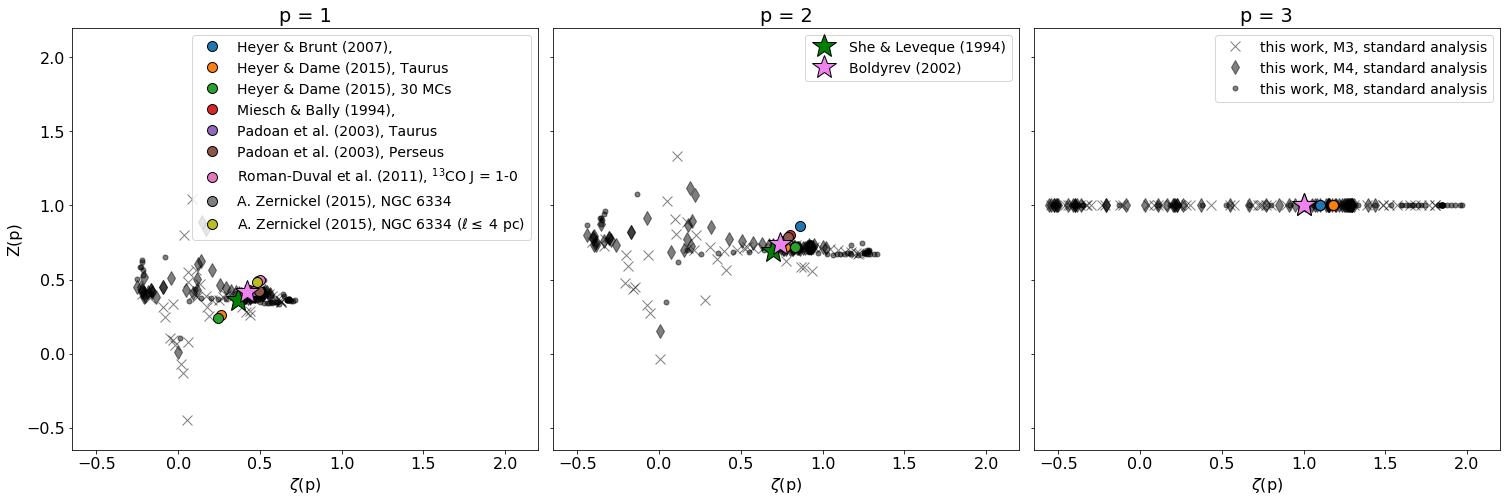

In [14]:
nrows = 1
ncols = 3
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,sharex=True,sharey=True,figsize=(21,7))

xr = [-0.65,2.2]
yr = xr

ms = 10

for ip in range(1,4):
    for icloud in range(len(fcloud)):
        cloud = fcloud[icloud]
        ifile = glob(('%s/vsfhr04/*%s*' % (ddir,cloud)))[0]
        zeta1,zeta2,zeta3 = np.loadtxt(ifile,skiprows=1,usecols=(1,2,3),unpack=True)
        if(ip==1):
            pzeta = zeta1
            pz    = zeta1/zeta3
        if(ip==2):
            pzeta = zeta2
            pz    = zeta2/zeta3
        if(ip==3):
            pzeta = zeta3
            pz    = zeta3/zeta3
        
        if(ip==3): 
            ax[ip-1].plot(pzeta,pz,marker=marker[icloud],color='black',ms=ms,ls='',alpha=0.5,label=('this work, %s, standard analysis' % cloud))
        else: 
            ax[ip-1].plot(pzeta,pz,marker=marker[icloud],color='black',ms=ms,ls='',alpha=0.5)
ax[2].legend(loc=0,fontsize=14)

ms = 10
    
for ip in range(1,4):
    h = np.where(p==ip)[0]
    lref = np.array([])
    for i in range(len(h)):
        lref = ('%s, %s' % (ref[h[i]],rlabel[h[i]]))
    
        ax[ip-1].set_title(('p = %i' % ip))
        ax[ip-1].set_xlabel('$\zeta$(p)')
        ax[ip-1].set_xlim(xr)
        ax[ip-1].set_ylim(yr)
        if(ip==1): 
            ax[ip-1].set_ylabel('Z(p)')
            ax[ip-1].plot(zeta[h[i]],z[h[i]],marker='o',markeredgecolor='black',ms=ms,ls='',label=lref)
        else:
            ax[ip-1].plot(zeta[h[i]],z[h[i]],marker='o',markeredgecolor='black',ms=ms,ls='')
ax[0].legend(loc=0,fontsize=14)

ms = 25

for ip in range(1,4):
        if(ip==2): 
            lref = 'She & Leveque (1994)'
            ax[ip-1].plot([zshe(ip)],[zshe(ip)],marker='*',color='green',markeredgecolor='black',ms=ms,ls='',label=lref)
            lref = 'Boldyrev (2002)'
            ax[ip-1].plot([zboldyrev(ip)],[zboldyrev(ip)],marker='*',color='violet',markeredgecolor='black',ms=ms,ls='',label=lref)
        else:
            ax[ip-1].plot([zshe(ip)],[zshe(ip)],marker='*',color='green',markeredgecolor='black',ms=ms,ls='')
            ax[ip-1].plot([zboldyrev(ip)],[zboldyrev(ip)],marker='*',color='violet',markeredgecolor='black',ms=ms,ls='')
ax[1].legend(loc=0,fontsize=14)


fig.subplots_adjust(wspace=0)
fig.tight_layout(pad=0.5)
fig.savefig('compare_observations.pdf')